In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

UsageError: unrecognized arguments: # Plots show up in notebook


In [2]:
df= pd.read_csv("E:/Amazon product review/1429_1.csv")

In [3]:
df.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [4]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"    

In [5]:
df["Sentiment"] = df["reviews.rating"].apply(sentiments)

In [6]:
df['Sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
34655     Neutral
34656    Negative
34657    Negative
34658    Negative
34659    Negative
Name: Sentiment, Length: 34660, dtype: object

In [7]:
df.drop(['name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username'], axis=1, inplace= True)

In [8]:
df.head(2)

,id,reviews.didPurchase,reviews.doRecommend,reviews.rating,reviews.text,Sentiment
0,AVqkIhwDv8e3D1O-lebb,NaN,True,5.0,This product so far has not disappointed. My c...,Positive
1,AVqkIhwDv8e3D1O-lebb,NaN,True,5.0,great for beginner or experienced person. Boug...,Positive


In [9]:
df.drop(['reviews.didPurchase', 'reviews.doRecommend','reviews.rating'], axis=1, inplace= True)

In [10]:
df.head(2)

,id,reviews.text,Sentiment
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,Positive
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,Positive


#### Map the target variable

In [11]:
d = {'Neutral': 0, 'Positive': 1, 'Negative': 2}
df['Sentiment'] = df['Sentiment'].map(d)

In [13]:
df.tail(20)

,id,reviews.text,Sentiment
34640,AVpggqsrLJeJML43O5zp,Surpassed my expectations it charges faster th...,1.0
34641,AVpggqsrLJeJML43O5zp,Amazon already includes this cable with the Ki...,1.0
34642,AVpggqsrLJeJML43O5zp,I bought this for myself because i play my kin...,1.0
34643,AVpggqsrLJeJML43O5zp,This cord works great! I also love that it is ...,1.0
34644,AVpggqsrLJeJML43O5zp,Corrected the problem with the kindle not char...,1.0
34645,AVpggqsrLJeJML43O5zp,"Works well with all Kindle models, either as a...",1.0
34646,AVpggqsrLJeJML43O5zp,I have only used it one time to download an e-...,1.0
34647,AVpfiBlyLJeJML43-4Tp,Excellent charging quality with heavy duty cor...,1.0
34648,AVpfiBlyLJeJML43-4Tp,This charger (9W) rapid charger is as describe...,1.0
34649,AVpfiBlyLJeJML43-4Tp,just what i expected and just what I wanted. t...,1.0


#### Check how much null values we have

In [14]:
df.isnull().sum()

id               0
reviews.text     1
Sentiment       33
dtype: int64

In [15]:
df= df.dropna()

In [16]:
df.isnull().sum()

id              0
reviews.text    0
Sentiment       0
dtype: int64

#### Converting HTML entities 

In [17]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [18]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [19]:
# Created a new columns i.e. clean_tweet contains the same review but cleaned version
df['clean_review'] = df['reviews.text'].apply(lambda x: html_parser.unescape(x))
df.tail(10)

,id,reviews.text,Sentiment,clean_review
34650,AVpfiBlyLJeJML43-4Tp,Although the description states that this will...,2.0,Although the description states that this will...
34651,AVpfiBlyLJeJML43-4Tp,Connects snugly!,1.0,Connects snugly!
34652,AVpfiBlyLJeJML43-4Tp,So I was already not too pleased with Amazon's...,2.0,So I was already not too pleased with Amazon's...
34653,AVpfiBlyLJeJML43-4Tp,"As a charger, it works but is nothing special....",2.0,"As a charger, it works but is nothing special...."
34654,AVpfiBlyLJeJML43-4Tp,This is exactly like any other usb power charg...,2.0,This is exactly like any other usb power charg...
34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...,0.0,This is not appreciably faster than any other ...
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,2.0,Amazon should include this charger with the Ki...
34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...,2.0,Love my Kindle Fire but I am really disappoint...
34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,2.0,I was surprised to find it did not come with a...
34659,AVpfiBlyLJeJML43-4Tp,to spite the fact that i have nothing but good...,2.0,to spite the fact that i have nothing but good...


#### Remove HTML Taggs 

In [21]:
import re
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

print(remove_html(text))


 H2O
 AutoML
 Driverless AI



In [22]:
df['clean_review'] = df['reviews.text'].apply(lambda x: remove_html(x))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,This product so far has not disappointed. My c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person. Boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,Inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,I've had my Fire HD 8 two weeks now and I love...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,I bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,This amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,"Great for e-reading on the go, nice and light ..."
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,"I gave this as a Christmas gift to my inlaws, ..."
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,Great as a device to read books. I like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,I love ordering books and reading them with th...


#### Removing "@user" from all the reviews

In [23]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [24]:
# remove reviews handles (@user)
df['clean_review'] = np.vectorize(remove_pattern)(df['clean_review'], "@[\w]*")
df.tail(10)

,id,reviews.text,Sentiment,clean_review
34650,AVpfiBlyLJeJML43-4Tp,Although the description states that this will...,2.0,Although the description states that this will...
34651,AVpfiBlyLJeJML43-4Tp,Connects snugly!,1.0,Connects snugly!
34652,AVpfiBlyLJeJML43-4Tp,So I was already not too pleased with Amazon's...,2.0,So I was already not too pleased with Amazon's...
34653,AVpfiBlyLJeJML43-4Tp,"As a charger, it works but is nothing special....",2.0,"As a charger, it works but is nothing special...."
34654,AVpfiBlyLJeJML43-4Tp,This is exactly like any other usb power charg...,2.0,This is exactly like any other usb power charg...
34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...,0.0,This is not appreciably faster than any other ...
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,2.0,Amazon should include this charger with the Ki...
34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...,2.0,Love my Kindle Fire but I am really disappoint...
34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,2.0,I was surprised to find it did not come with a...
34659,AVpfiBlyLJeJML43-4Tp,to spite the fact that i have nothing but good...,2.0,to spite the fact that i have nothing but good...


#### Changing all the reviews into lowercase

In [25]:
df['clean_review'] = df['clean_review'].apply(lambda x: x.lower())
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed. my c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person. boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,i've had my fire hd 8 two weeks now and i love...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,i bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,"great for e-reading on the go, nice and light ..."
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,"i gave this as a christmas gift to my inlaws, ..."
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as a device to read books. i like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,i love ordering books and reading them with th...


 #### Apostrophe Lookup

In [26]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [27]:
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [28]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [29]:
df['clean_review'] = df['clean_review'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed. my c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person. boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,I have had my fire hd 8 two weeks now and i lo...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,i bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,"great for e-reading on the go, nice and light ..."
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,"i gave this as a christmas gift to my inlaws, ..."
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as a device to read books. i like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,i love ordering books and reading them with th...


#### Short word lookup 

In [31]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [32]:
df['clean_review'] = df['clean_review'].apply(lambda x: lookup_dict(x,short_word_dict))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed. my c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person. boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,I have had my fire hd 8 two weeks now and i lo...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,i bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,"great for e-reading on the go, nice and light ..."
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,"i gave this as a christmas gift to my inlaws, ..."
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as a device to read books. i like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,i love ordering books and reading them with th...


#### Emoticon Lookup

In [34]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [35]:
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [37]:
df['clean_review'] = df['clean_review'].apply(lambda x: lookup_dict(x,emoticon_dict))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed. my c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person. boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,I have had my fire hd 8 two weeks now and i lo...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,i bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,"great for e-reading on the go, nice and light ..."
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,"i gave this as a christmas gift to my inlaws, ..."
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as a device to read books. i like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,i love ordering books and reading them with th...


#### ReplacingPunctuations with space

In [38]:
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed my c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,I have had my fire hd 8 two weeks now and i lo...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,i bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,great for e reading on the go nice and light ...
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,i gave this as a christmas gift to my inlaws ...
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as a device to read books i like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,i love ordering books and reading them with th...


#### Replacing Special Characters with space

In [39]:
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed my c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,I have had my fire hd 8 two weeks now and i lo...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,i bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,great for e reading on the go nice and light ...
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,i gave this as a christmas gift to my inlaws ...
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as a device to read books i like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,i love ordering books and reading them with th...


#### Replacing Numbers (integers) with space

In [40]:
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed my c...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person boug...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,I have had my fire hd two weeks now and i lo...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,i bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,great for e reading on the go nice and light ...
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,i gave this as a christmas gift to my inlaws ...
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as a device to read books i like that i...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,i love ordering books and reading them with th...


#### Removing words whom length is 1

In [41]:
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['clean_review'][0:5]

0    this product so far has not disappointed my ch...
1    great for beginner or experienced person bough...
2    inexpensive tablet for him to use and learn on...
3    have had my fire hd two weeks now and love it ...
4    bought this for my grand daughter when she com...
Name: clean_review, dtype: object

#### Remove URL from Text

In [42]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [43]:
df['clean_review'] = df['clean_review'].apply(lambda x: remove_urls(x))
df.head(10)

,id,reviews.text,Sentiment,clean_review
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,this product so far has not disappointed my ch...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,great for beginner or experienced person bough...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,have had my fire hd two weeks now and love it ...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,bought this for my grand daughter when she com...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,this amazon fire inch tablet is the perfect si...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,great for reading on the go nice and light wei...
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,gave this as christmas gift to my inlaws husba...
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,great as device to read books like that it lin...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,love ordering books and reading them with the ...


In [45]:
pip install textblob

#### Spelling Correction - With TextBlob Library

In [46]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [47]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


#### Applying TextBlob on our data set - Spelling correction

In [48]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text = df['clean_review'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    this product so far has not disappointed my ch...
1    great for beginner or experienced person bough...
2    expensive tablet for him to use and learn on s...
3    have had my fire he two weeks now and love it ...
4    bought this for my grand daughter when she com...
5    this amazon fire inch tablet is the perfect si...
6    great for reading on the go nice and light wei...
7    gave this as christmas gift to my laws husband...
8    great as device to read books like that it lin...
9    love ordering books and reading them with the ...
Name: clean_review, dtype: object

In [49]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [51]:
# Importing stop words from NLTK corpus for english language
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [54]:
# Created new columns of tokens - where stop words are being removed
df['review_token_filtered'] = df['clean_review'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
df[['clean_review', 'review_token_filtered']].head(10)

,clean_review,review_token_filtered
0,"[this, product, so, far, has, not, disappointe...","[product, far, disappointed, children, love, u..."
1,"[great, for, beginner, or, experienced, person...","[great, beginner, experienced, person, bought,..."
2,"[inexpensive, tablet, for, him, to, use, and, ...","[inexpensive, tablet, use, learn, step, nabi, ..."
3,"[have, had, my, fire, hd, two, weeks, now, and...","[fire, hd, two, weeks, love, tablet, great, va..."
4,"[bought, this, for, my, grand, daughter, when,...","[bought, grand, daughter, comes, visit, set, u..."
5,"[this, amazon, fire, inch, tablet, is, the, pe...","[amazon, fire, inch, tablet, perfect, size, pu..."
6,"[great, for, reading, on, the, go, nice, and, ...","[great, reading, go, nice, light, weight, pric..."
7,"[gave, this, as, christmas, gift, to, my, inla...","[gave, christmas, gift, inlaws, husband, uncle..."
8,"[great, as, device, to, read, books, like, tha...","[great, device, read, books, like, links, borr..."
9,"[love, ordering, books, and, reading, them, wi...","[love, ordering, books, reading, reader]"


#### Stemming & Lemmatization 

In [55]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [56]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
df['review_stemmed'] = df['review_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['review_stemmed'].head(10)

0    product far disappoint children love use like ...
1       great beginn experienc person bought gift love
2    inexpens tablet use learn step nabi thrill lea...
3    fire hd two week love tablet great valu prime ...
4    bought grand daughter come visit set user ente...
5    amazon fire inch tablet perfect size purchas h...
6    great read go nice light weight price point gi...
7    gave christma gift inlaw husband uncl love eas...
8    great devic read book like link borrow librari...
9                          love order book read reader
Name: review_stemmed, dtype: object

In [57]:
# Importing library for lemmatizing
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [58]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
df['review_lemmatized'] = df['review_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['review_lemmatized'].head(10)

0    product far disappointed child love use like a...
1    great beginner experienced person bought gift ...
2    inexpensive tablet use learn step nabi thrille...
3    fire hd two week love tablet great value prime...
4    bought grand daughter come visit set user ente...
5    amazon fire inch tablet perfect size purchased...
6    great reading go nice light weight price point...
7    gave christmas gift inlaws husband uncle loved...
8    great device read book like link borrowed libr...
9                    love ordering book reading reader
Name: review_lemmatized, dtype: object

In [59]:
df.head(10)

,id,reviews.text,Sentiment,clean_review,review_token_filtered,review_stemmed,review_lemmatized
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,"[this, product, so, far, has, not, disappointe...","[product, far, disappointed, children, love, u...",product far disappoint children love use like ...,product far disappointed child love use like a...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,"[great, for, beginner, or, experienced, person...","[great, beginner, experienced, person, bought,...",great beginn experienc person bought gift love,great beginner experienced person bought gift ...
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,1.0,"[inexpensive, tablet, for, him, to, use, and, ...","[inexpensive, tablet, use, learn, step, nabi, ...",inexpens tablet use learn step nabi thrill lea...,inexpensive tablet use learn step nabi thrille...
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,1.0,"[have, had, my, fire, hd, two, weeks, now, and...","[fire, hd, two, weeks, love, tablet, great, va...",fire hd two week love tablet great valu prime ...,fire hd two week love tablet great value prime...
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,1.0,"[bought, this, for, my, grand, daughter, when,...","[bought, grand, daughter, comes, visit, set, u...",bought grand daughter come visit set user ente...,bought grand daughter come visit set user ente...
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,1.0,"[this, amazon, fire, inch, tablet, is, the, pe...","[amazon, fire, inch, tablet, perfect, size, pu...",amazon fire inch tablet perfect size purchas h...,amazon fire inch tablet perfect size purchased...
6,AVqkIhwDv8e3D1O-lebb,"Great for e-reading on the go, nice and light ...",1.0,"[great, for, reading, on, the, go, nice, and, ...","[great, reading, go, nice, light, weight, pric...",great read go nice light weight price point gi...,great reading go nice light weight price point...
7,AVqkIhwDv8e3D1O-lebb,"I gave this as a Christmas gift to my inlaws, ...",1.0,"[gave, this, as, christmas, gift, to, my, inla...","[gave, christmas, gift, inlaws, husband, uncle...",gave christma gift inlaw husband uncl love eas...,gave christmas gift inlaws husband uncle loved...
8,AVqkIhwDv8e3D1O-lebb,Great as a device to read books. I like that i...,1.0,"[great, as, device, to, read, books, like, tha...","[great, device, read, books, like, links, borr...",great devic read book like link borrow librari...,great device read book like link borrowed libr...
9,AVqkIhwDv8e3D1O-lebb,I love ordering books and reading them with th...,1.0,"[love, ordering, books, and, reading, them, wi...","[love, ordering, books, reading, reader]",love order book read reader,love ordering book reading reader


#### Generatig word cloud 

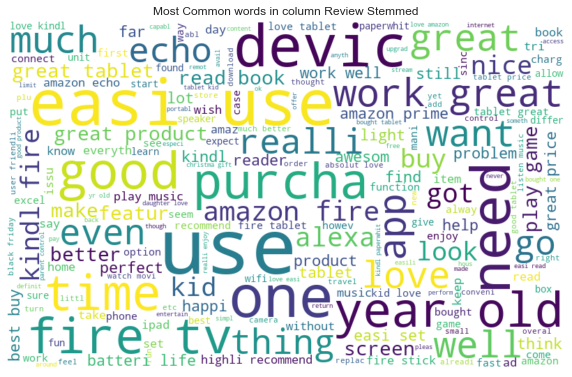

In [60]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['review_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Review Stemmed")
plt.show()

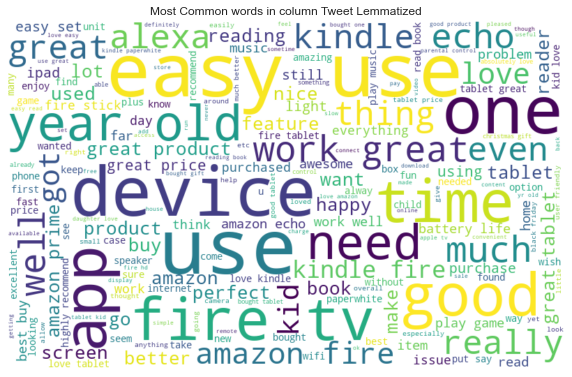

In [61]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['review_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

#### Most common words in non racist/sexist tweets

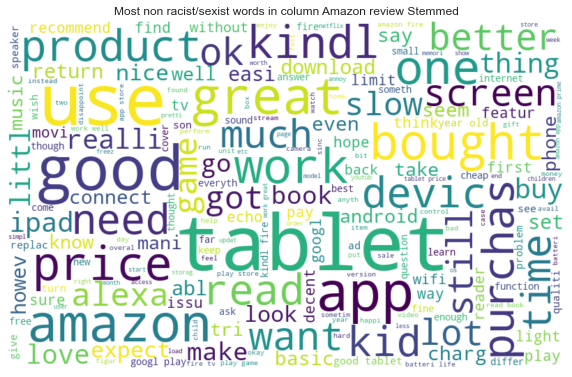

In [65]:
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
normal_words =' '.join([text for text in df['review_stemmed'][df['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Amazon review Stemmed")
plt.show()

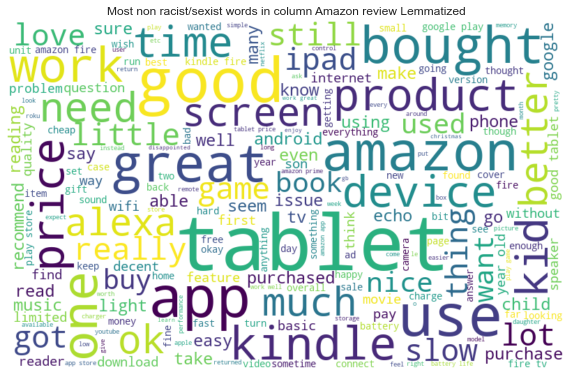

In [68]:

#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in df['review_lemmatized'][df['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Amazon review Lemmatized")
plt.show()

#### Most common words in racist/sexist reviews

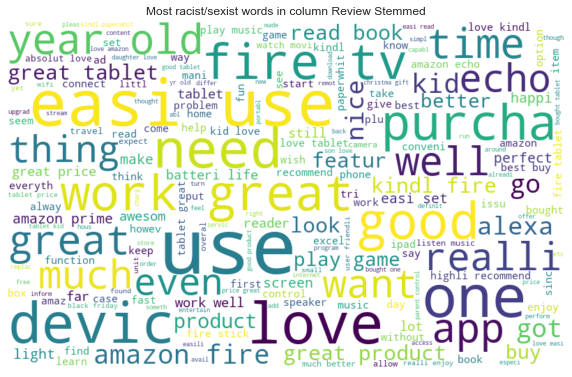

In [69]:

#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in df['review_stemmed'][df['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Review Stemmed")
plt.show()

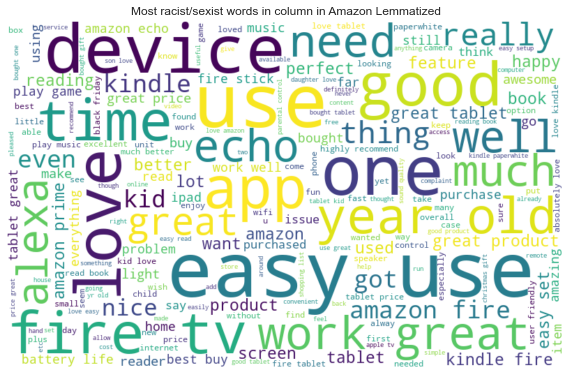

In [71]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in df['review_lemmatized'][df['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column in Amazon Lemmatized")
plt.show()

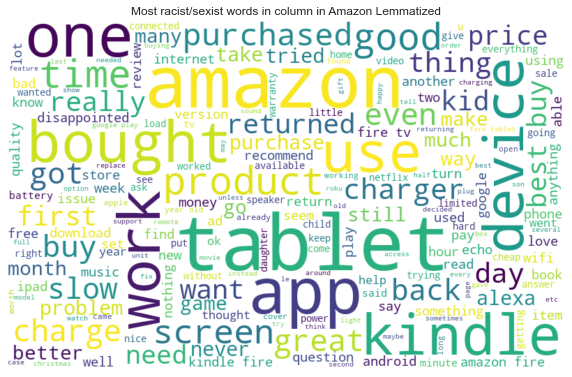

In [72]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in df['review_lemmatized'][df['Sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column in Amazon Lemmatized")
plt.show()

In [73]:
df.head(2)

,id,reviews.text,Sentiment,clean_review,review_token_filtered,review_stemmed,review_lemmatized
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,1.0,"[this, product, so, far, has, not, disappointe...","[product, far, disappointed, children, love, u...",product far disappoint children love use like ...,product far disappointed child love use like a...
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,1.0,"[great, for, beginner, or, experienced, person...","[great, beginner, experienced, person, bought,...",great beginn experienc person bought gift love,great beginner experienced person bought gift ...


In [74]:
# saving the dataframe 
df.to_csv('E:/Amzon Product Review/review_processing_file.csv')